In [1]:
from Univariate import Univariate
import pandas as pd
preprocessed_dataset=pd.read_csv("../Datasets/Clustering/Bank Customer Segmentation/preprocessed_dataset.csv")

In [2]:
quan,qual=Univariate.quan_qual(preprocessed_dataset)

In [3]:
quan

['CustAccountBalance', 'TransactionAmount (INR)', 'Hour', 'Minute', 'Age']

In [4]:
qual

['CustomerDOB',
 'CustGender',
 'CustLocation',
 'TransactionDate',
 'TransactionTime',
 'TimePeriod',
 'HourMinute']

### Measures of Central Tendency

In [5]:
descriptive_analysis_table=pd.DataFrame()

In [6]:
from Univariate import Univariate
Univariate.descriptive_analysis(preprocessed_dataset, quan)

,CustAccountBalance,TransactionAmount (INR),Hour,Minute,Age
Mean,79061.1,1290.27,10.4375,29.1234,37.3111
Median,14842.5,398,10,29,37
Mode,115537,100,10,20,35
Q1:25th,4181.37,146,5,14,33
Q2:50th,14842.5,398,10,29,37
Q3:75th,47929.8,1007,15,44,41
Q:99th,1.08432e+06,15418.7,23,58,49
Q4:100th,2.79796e+07,1.56003e+06,23,59,50
skewness,24.5017,85.6969,0.253728,0.00559909,0.407808
kurtosis,1043.52,17637.9,-0.92626,-1.19774,-0.291623


### Interquartile Range

In [7]:
import numpy as np
descriptive_analysis_table=pd.DataFrame(index=["Q1:25th","Q2:50th","Q3:75th","Q4:100th","IQR","1.5rule",
                                               "lesser_outlier","greater_outlier","min","max"],columns=quan)

In [8]:
for columnName in quan:
    descriptive_analysis_table[columnName]["Q1:25th"]=preprocessed_dataset[columnName].quantile(0.25)
    descriptive_analysis_table[columnName]["Q2:50th"]=preprocessed_dataset[columnName].quantile(0.50)
    descriptive_analysis_table[columnName]["Q3:75th"]=preprocessed_dataset[columnName].quantile(0.75)
    descriptive_analysis_table[columnName]["Q4:100th"]=preprocessed_dataset[columnName].max()
    

In [9]:
for columnName in quan:
    descriptive_analysis_table[columnName]["IQR"]=descriptive_analysis_table[columnName]["Q3:75th"]-descriptive_analysis_table[columnName]["Q1:25th"]
    descriptive_analysis_table[columnName]["1.5rule"]=1.5*descriptive_analysis_table[columnName]["IQR"]
    descriptive_analysis_table[columnName]["lesser_outlier"]=descriptive_analysis_table[columnName]["Q1:25th"]-descriptive_analysis_table[columnName]["1.5rule"]
    descriptive_analysis_table[columnName]["greater_outlier"]=  descriptive_analysis_table[columnName]["Q3:75th"]+descriptive_analysis_table[columnName]["1.5rule"]
    descriptive_analysis_table[columnName]["min"]=preprocessed_dataset[columnName].min()
    descriptive_analysis_table[columnName]["max"]=preprocessed_dataset[columnName].max()

In [10]:
descriptive_analysis_table

,CustAccountBalance,TransactionAmount (INR),Hour,Minute,Age
Q1:25th,4181.37,146,5,14,33
Q2:50th,14842.5,398,10,29,37
Q3:75th,47929.8,1007,15,44,41
Q4:100th,2.79796e+07,1.56003e+06,23,59,50
IQR,43748.4,861,10,30,8
1.5rule,65622.6,1291.5,15,45,12
lesser_outlier,-61441.2,-1145.5,-10,-31,21
greater_outlier,113552,2298.5,30,89,53
min,0,0,0,0,0
max,2.79796e+07,1.56003e+06,23,59,50


### Finding Outliers

In [11]:
lesser_outlier_columns=[]
greater_outlier_columns=[]
for columnName in quan:
    if descriptive_analysis_table[columnName]["min"]<descriptive_analysis_table[columnName]["lesser_outlier"]:
        lesser_outlier_columns.append(columnName)
    if descriptive_analysis_table[columnName]["max"]>descriptive_analysis_table[columnName]["greater_outlier"]:
        greater_outlier_columns.append(columnName)

In [12]:
print("lowrange_outlier_columns",lesser_outlier_columns)
print("highrangeoutlier_columns",greater_outlier_columns)

lowrange_outlier_columns ['Age']
highrangeoutlier_columns ['CustAccountBalance', 'TransactionAmount (INR)']


### Replacing Outliers

In [13]:
for columnName in lesser_outlier_columns:
    descriptive_analysis_table[columnName]["min"]=descriptive_analysis_table[columnName]["lesser_outlier"]

for columnName in greater_outlier_columns:
    descriptive_analysis_table[columnName]["max"]=descriptive_analysis_table[columnName]["greater_outlier"]

In [14]:
descriptive_analysis_table

,CustAccountBalance,TransactionAmount (INR),Hour,Minute,Age
Q1:25th,4181.37,146,5,14,33
Q2:50th,14842.5,398,10,29,37
Q3:75th,47929.8,1007,15,44,41
Q4:100th,2.79796e+07,1.56003e+06,23,59,50
IQR,43748.4,861,10,30,8
1.5rule,65622.6,1291.5,15,45,12
lesser_outlier,-61441.2,-1145.5,-10,-31,21
greater_outlier,113552,2298.5,30,89,53
min,0,0,0,0,21
max,113552,2298.5,23,59,50


### Probability Density Function (PDF)


In [15]:
import seaborn as sns

In [16]:
def get_pdf_probability(preprocessed_dataset,startrange,endrange):
    from matplotlib import pyplot
    from scipy.stats import norm
    import seaborn as sns
    ax = sns.distplot(preprocessed_dataset,kde=True,kde_kws={'color':'blue'},color='Green')
    pyplot.axvline(startrange,color='Red')
    pyplot.axvline(endrange,color='Red')
    # generate a sample
    sample = preprocessed_dataset
    # calculate parameters
    sample_mean =sample.mean()
    sample_std = sample.std()
    print('Mean=%.3f, Standard Deviation=%.3f' % (sample_mean, sample_std))
    # define the distribution
    dist = norm(sample_mean, sample_std)
    
    # sample probabilities for a range of outcomes
    values = [value for value in range(startrange, endrange)]
    probabilities = [dist.pdf(value) for value in values]    
    prob=sum(probabilities)
    print("The area between range({},{}):{}".format(startrange,endrange,sum(probabilities)))
    return prob

C:\Anaconda3\envs\aiml\lib\site-packages\ipykernel_launcher.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """


Mean=1290.270, Standard Deviation=5663.941
The area between range(1000,50000):0.5204715180919586


0.5204715180919586

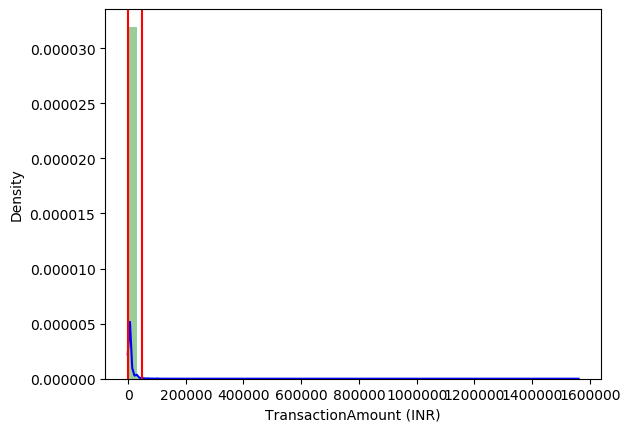

In [17]:
get_pdf_probability(preprocessed_dataset["TransactionAmount (INR)"],1000,50000)

### Cumulative Distribution Function (CDF)

In [24]:
!pip install statsmodels
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(preprocessed_dataset['TransactionAmount (INR)'])
ecdf(1000)

0.7489495415677448

### Standard Normal Distribution & Z-Score

In [25]:
def stdNBgraph(dataset):
        # Coverted to standard Normal Distribution
    import seaborn as sns
    mean=preprocessed_dataset.mean()
    std=preprocessed_dataset.std()

    values=[i for i in preprocessed_dataset]

    z_score=[((j-mean)/std) for j in values]

    sns.distplot(z_score,kde=True)

    sum(z_score)/len(z_score)
    #z_score.std()


In [ ]:
stdNBgraph(preprocessed_dataset["TransactionAmount (INR)"])

### Frequencey

In [18]:
frequency_table=pd.DataFrame()

In [21]:
def freq_table(preprocessed_dataset,columnName):
    frequency_table=pd.DataFrame(columns=["Unique_Values","Frequency","Relative_Frequency","Cumulative_Frequency"])
    unique_count=preprocessed_dataset[columnName].nunique()
    frequency_table["Unique_Values"]=preprocessed_dataset[columnName].value_counts().index
    frequency_table["Frequency"]=preprocessed_dataset[columnName].value_counts().values
    frequency_table["Relative_Frequency"]=frequency_table["Frequency"]/unique_count
    frequency_table["Cumulative_Frequency"]=preprocessed_dataset[columnName].cumsum()
    return frequency_table

In [22]:
freq_table(preprocessed_dataset,"CustAccountBalance")

,Unique_Values,Frequency,Relative_Frequency,Cumulative_Frequency
0,115537.260095,1568,0.013232,1.781905e+04
1,0.000000,1122,0.009468,3.569349e+04
2,45856.240000,393,0.003316,4.240792e+04
3,10238.630000,354,0.002987,4.338138e+04
4,25256.280000,262,0.002211,1.384569e+05
...,...,...,...,...
118495,29305.100000,1,0.000008,9.150146e+09
118496,2456.190000,1,0.000008,9.150252e+09
118497,23350.160000,1,0.000008,9.150326e+09
118498,863.250000,1,0.000008,9.150346e+09
